In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Load the dataset
data_path = './dataset/Combined Data.csv'
df = pd.read_csv(data_path)

In [3]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [4]:
# Basic Information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
         Unnamed: 0
count  53043.000000
mean   26521.000000
std    15312.339501
min        0.000000
25%    13260.500000
50%    26521.000000
75%    39781.500000
max    53042.000000


In [6]:
# Checking for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Unnamed: 0      0
statement     362
status          0
dtype: int64


In [7]:
# Handling missing values (drop rows with missing 'statement')
df_cleaned = df.dropna(subset=['statement'])
print(f"\nShape after dropping rows with missing 'statement': {df_cleaned.shape}")


Shape after dropping rows with missing 'statement': (52681, 3)


In [8]:
# Drop the unnecessary 'Unnamed: 0' column (index-like)
if 'Unnamed: 0' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['Unnamed: 0'])

In [9]:
# Exploratory Data Analysis (EDA)
# Check for duplicate entries
print("\nDuplicate Entries:")
print(df_cleaned.duplicated().sum())


Duplicate Entries:
1588


In [10]:
# Removing duplicate entries (if any)
df_cleaned = df_cleaned.drop_duplicates()
print(f"Shape after removing duplicates: {df_cleaned.shape}")

Shape after removing duplicates: (51093, 2)



Status Value Counts:
status
Normal                  16040
Depression              15094
Suicidal                10644
Anxiety                  3623
Bipolar                  2501
Stress                   2296
Personality disorder      895
Name: count, dtype: int64


C:\Users\adity\AppData\Local\Temp\ipykernel_11936\3266378658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='status', palette='coolwarm', order=df_cleaned['status'].value_counts().index)


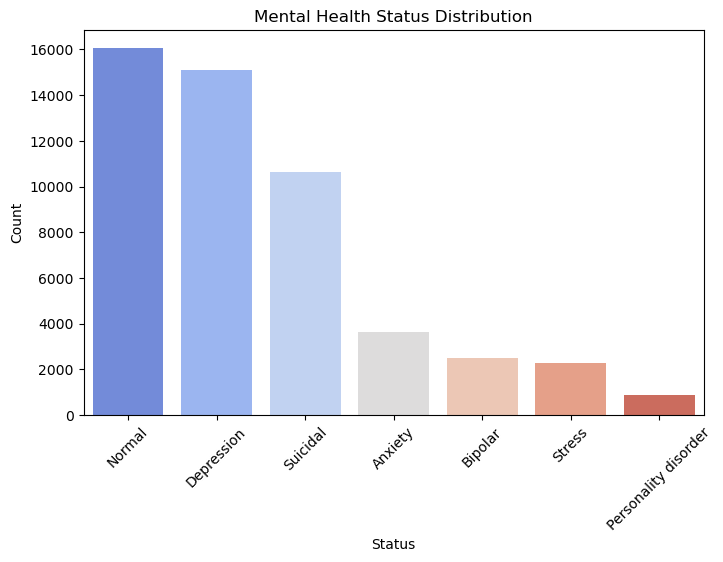

In [11]:
# Visualizing status distribution (mental health conditions)
if 'status' in df_cleaned.columns:
    print("\nStatus Value Counts:")
    print(df_cleaned['status'].value_counts())

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_cleaned, x='status', palette='coolwarm', order=df_cleaned['status'].value_counts().index)
    plt.title("Mental Health Status Distribution")
    plt.xlabel("Status")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

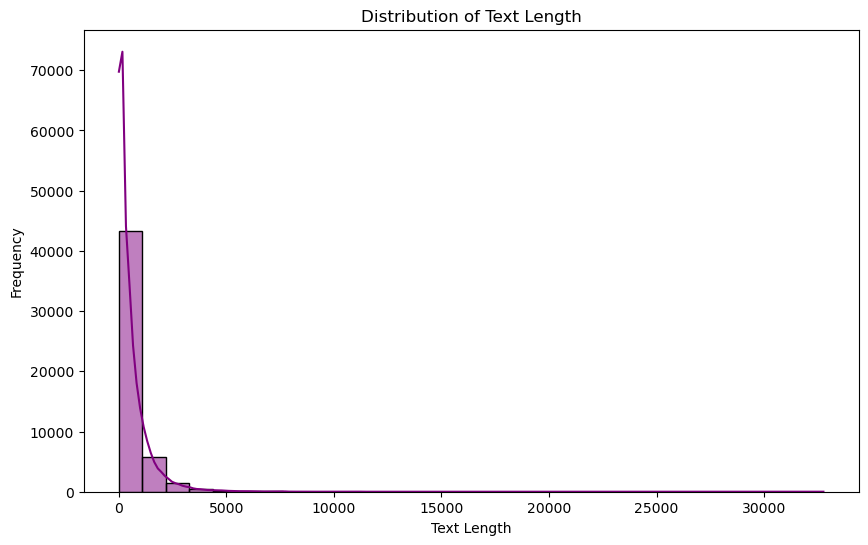


Text Length Statistics:
count    51093.000000
mean       575.600141
std        847.947705
min          2.000000
25%         79.000000
50%        313.000000
75%        745.000000
max      32759.000000
Name: Text_Length, dtype: float64


In [12]:
# Text Length Analysis
if 'statement' in df_cleaned.columns:
    df_cleaned['Text_Length'] = df_cleaned['statement'].apply(len)

    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned['Text_Length'], kde=True, color='purple', bins=30)
    plt.title("Distribution of Text Length")
    plt.xlabel("Text Length")
    plt.ylabel("Frequency")
    plt.show()

    print("\nText Length Statistics:")
    print(df_cleaned['Text_Length'].describe())


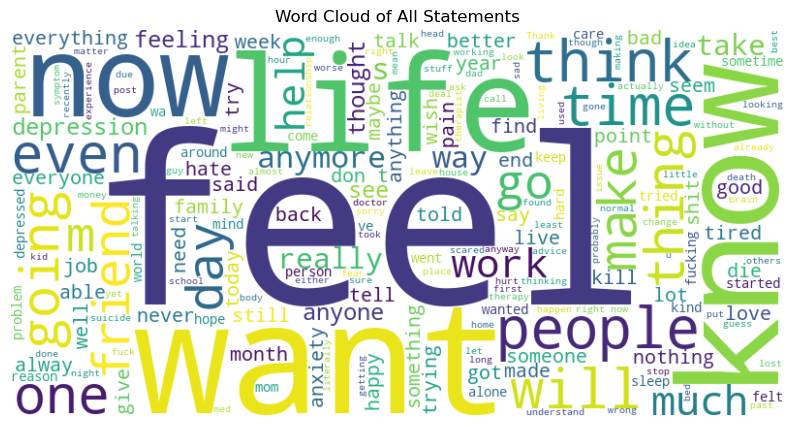

In [13]:
# Word Cloud for text data
if 'statement' in df_cleaned.columns:
    all_text = ' '.join(df_cleaned['statement'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of All Statements")
    plt.show()

In [14]:
# Insights and Summary
print("\nSummary of Analysis:")
print(f"Number of records after cleaning: {df_cleaned.shape[0]}")
if 'status' in df_cleaned.columns:
    print("Status distribution:")
    print(df_cleaned['status'].value_counts(normalize=True))
if 'Text_Length' in df_cleaned.columns:
    print("Text length insights:")
    print(df_cleaned['Text_Length'].describe())


Summary of Analysis:
Number of records after cleaning: 51093
Status distribution:
status
Normal                  0.313937
Depression              0.295422
Suicidal                0.208326
Anxiety                 0.070910
Bipolar                 0.048950
Stress                  0.044938
Personality disorder    0.017517
Name: proportion, dtype: float64
Text length insights:
count    51093.000000
mean       575.600141
std        847.947705
min          2.000000
25%         79.000000
50%        313.000000
75%        745.000000
max      32759.000000
Name: Text_Length, dtype: float64
